# **Income Classifier**

### Import Package and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn 
%matplotlib inline

In [4]:
income_df = pd.read_csv("income.csv")
income_df.head()

,age,workclass,education,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25.0,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0,40.0,United-States,<=50K
1,38.0,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0,50.0,United-States,<=50K
2,28.0,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0,40.0,United-States,>50K
3,44.0,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0,40.0,United-States,>50K
4,18.0,?,Some-college,Never-married,?,Own-child,White,Female,0.0,0,30.0,United-States,<=50K


In [5]:
income_df.describe()

,age,capital-gain,capital-loss,hours-per-week
count,48854.000000,48853.000000,48855.000000,48854.000000
mean,38.644369,1078.956031,87.479030,40.421132
std,13.710335,7451.235172,402.953456,12.391544
min,17.000000,0.000000,0.000000,1.000000
25%,28.000000,0.000000,0.000000,40.000000
50%,37.000000,0.000000,0.000000,40.000000
75%,48.000000,0.000000,0.000000,45.000000
max,90.000000,99999.000000,4356.000000,99.000000


### Data Dictionary

** *1. Categorical Attributes* **
 * workclass: (categorical) Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
  -  Individual work category  
 * education: (categorical) Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
  -  Individual's highest education degree  
 * marital-status: (categorical) Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
  -  Individual marital status  
 * occupation: (categorical) Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
  -  Individual's occupation  
 * relationship: (categorical) Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
  -  Individual's relation in a family   
 * race: (categorical) White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
  -  Race of Individual   
 * gender: (categorical) Female, Male.
 * native-country: (categorical) United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
  -  Individual's native country   



** *2. Continuous Attributes* **
 * age: continuous.
  -  Age of an individual  
 * capital-gain: continuous.
 * capital-loss: continuous.
 * hours-per-week: continuous.
  -  Individual's working hour per week   





## Data Cleaning

 ### Dealing with Missing Value

In [6]:
income_df.isnull().sum()

age               1
workclass         4
education         3
marital-status    2
occupation        6
relationship      0
race              0
gender            4
capital-gain      2
capital-loss      0
hours-per-week    1
native-country    0
income            0
dtype: int64

In [7]:
my_df=income_df.dropna()

In [8]:
my_df.isnull().sum()

age               0
workclass         0
education         0
marital-status    0
occupation        0
relationship      0
race              0
gender            0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [9]:
my_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48842 entries, 0 to 48854
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             48842 non-null  float64
 1   workclass       48842 non-null  object 
 2   education       48842 non-null  object 
 3   marital-status  48842 non-null  object 
 4   occupation      48842 non-null  object 
 5   relationship    48842 non-null  object 
 6   race            48842 non-null  object 
 7   gender          48842 non-null  object 
 8   capital-gain    48842 non-null  float64
 9   capital-loss    48842 non-null  int64  
 10  hours-per-week  48842 non-null  float64
 11  native-country  48842 non-null  object 
 12  income          48842 non-null  object 
dtypes: float64(3), int64(1), object(9)
memory usage: 5.2+ MB


In [10]:
my_df=my_df.rename(columns={'income':'predclass'})

In [11]:
my_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48842 entries, 0 to 48854
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             48842 non-null  float64
 1   workclass       48842 non-null  object 
 2   education       48842 non-null  object 
 3   marital-status  48842 non-null  object 
 4   occupation      48842 non-null  object 
 5   relationship    48842 non-null  object 
 6   race            48842 non-null  object 
 7   gender          48842 non-null  object 
 8   capital-gain    48842 non-null  float64
 9   capital-loss    48842 non-null  int64  
 10  hours-per-week  48842 non-null  float64
 11  native-country  48842 non-null  object 
 12  predclass       48842 non-null  object 
dtypes: float64(3), int64(1), object(9)
memory usage: 5.2+ MB


## Feature Extraction

In [12]:
print('workclass',my_df.workclass.unique())
print('education',my_df.education.unique())
print('marital-status',my_df['marital-status'].unique())
print('occupation',my_df.occupation.unique())
print('relationship',my_df.relationship.unique())
print('race',my_df.race.unique())
print('gender',my_df.gender.unique())
print('native-country',my_df['native-country'].unique())
print('predclass',my_df.predclass.unique())

workclass ['Private' 'Local-gov' '?' 'Self-emp-not-inc' 'Federal-gov' 'State-gov'
 'Self-emp-inc' 'Without-pay' 'Never-worked']
education ['11th' 'HS-grad' 'Assoc-acdm' 'Some-college' '10th' 'Prof-school'
 '7th-8th' 'Bachelors' 'Masters' 'Doctorate' '5th-6th' 'Assoc-voc' '9th'
 '12th' '1st-4th' 'Preschool']
marital-status ['Never-married' 'Married-civ-spouse' 'Widowed' 'Divorced' 'Separated'
 'Married-spouse-absent' 'Married-AF-spouse']
occupation ['Machine-op-inspct' 'Farming-fishing' 'Protective-serv' '?'
 'Other-service' 'Prof-specialty' 'Craft-repair' 'Adm-clerical'
 'Exec-managerial' 'Tech-support' 'Sales' 'Priv-house-serv'
 'Transport-moving' 'Handlers-cleaners' 'Armed-Forces']
relationship ['Own-child' 'Husband' 'Not-in-family' 'Unmarried' 'Wife' 'Other-relative']
race ['Black' 'White' 'Asian-Pac-Islander' 'Other' 'Amer-Indian-Eskimo']
gender ['Male' 'Female']
native-country ['United-States' '?' 'Peru' 'Guatemala' 'Mexico' 'Dominican-Republic'
 'Ireland' 'Germany' 'Philippines' 

### Predclass

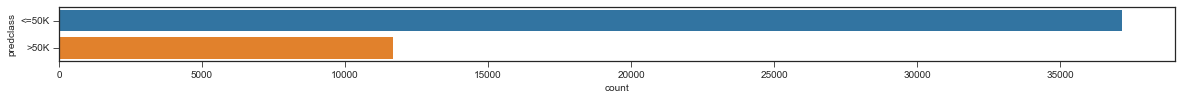

In [13]:
fig = plt.figure(figsize=(20,1))
plt.style.use('seaborn-ticks')
sns.countplot(y="predclass", data=my_df)

### Education

In [14]:

my_df['education'].replace('Preschool', 'dropout',inplace=True)
my_df['education'].replace('10th', 'dropout',inplace=True)
my_df['education'].replace('11th', 'dropout',inplace=True)
my_df['education'].replace('12th', 'dropout',inplace=True)
my_df['education'].replace('1st-4th', 'dropout',inplace=True)
my_df['education'].replace('5th-6th', 'dropout',inplace=True)
my_df['education'].replace('7th-8th', 'dropout',inplace=True)
my_df['education'].replace('9th', 'dropout',inplace=True)
my_df['education'].replace('HS-Grad', 'HighGrad',inplace=True)
my_df['education'].replace('HS-grad', 'HighGrad',inplace=True)
my_df['education'].replace('Some-college', 'CommunityCollege',inplace=True)
my_df['education'].replace('Assoc-acdm', 'CommunityCollege',inplace=True)
my_df['education'].replace('Assoc-voc', 'CommunityCollege',inplace=True)
my_df['education'].replace('Bachelors', 'Bachelors',inplace=True)
my_df['education'].replace('Masters', 'Masters',inplace=True)
my_df['education'].replace('Prof-school', 'Masters',inplace=True)
my_df['education'].replace('Doctorate', 'Doctorate',inplace=True)

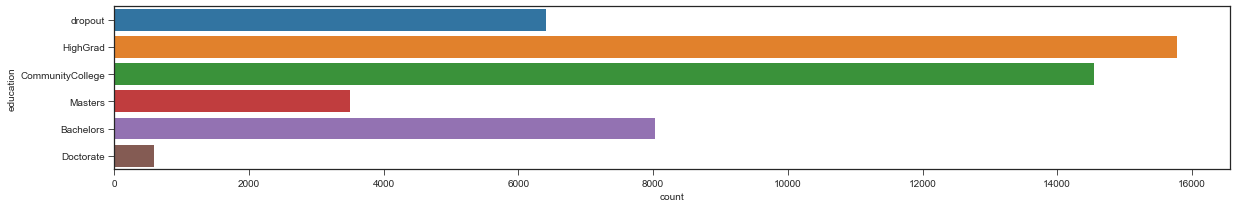

In [15]:
fig = plt.figure(figsize=(20,3))
plt.style.use('seaborn-ticks')
sns.countplot(y="education", data=my_df)

### Marital-status

In [16]:
#df2 = my_df['marital-status'].replace(' Never-married', 'NotMarried')
my_df['marital-status'].replace('Never-married', 'NotMarried',inplace=True)
my_df['marital-status'].replace(['Married-AF-spouse'], 'Married',inplace=True)
my_df['marital-status'].replace(['Married-civ-spouse'], 'Married',inplace=True)
my_df['marital-status'].replace(['Married-spouse-absent'], 'NotMarried',inplace=True)
my_df['marital-status'].replace(['Separated'], 'Separated',inplace=True)
my_df['marital-status'].replace(['Divorced'], 'Separated',inplace=True)
my_df['marital-status'].replace(['Widowed'], 'Widowed',inplace=True)

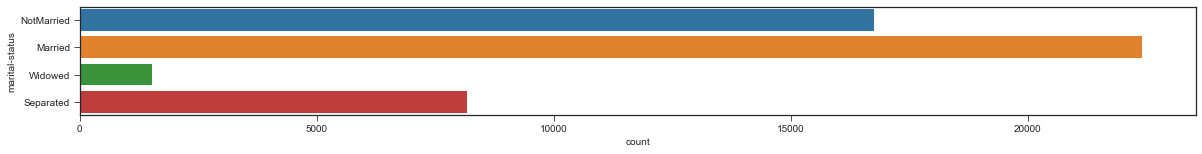

In [17]:
fig = plt.figure(figsize=(20,2))
plt.style.use('seaborn-ticks')
sns.countplot(y="marital-status", data=my_df)

### Occupation

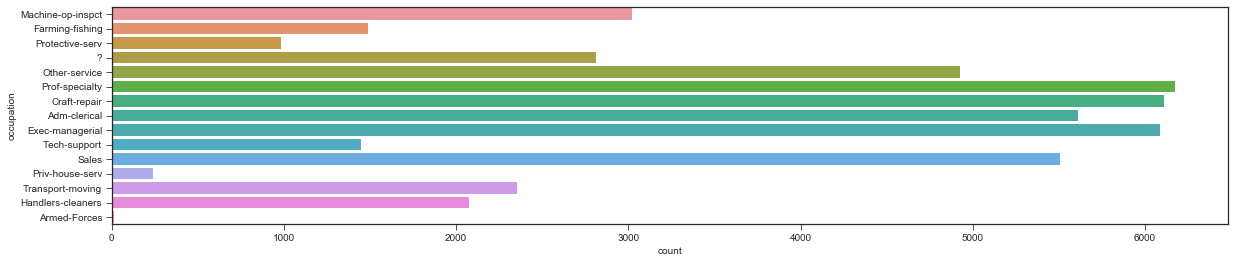

In [18]:
plt.style.use('seaborn-ticks')
plt.figure(figsize=(20,4)) 
sns.countplot(y="occupation", data=my_df)

### Workclass

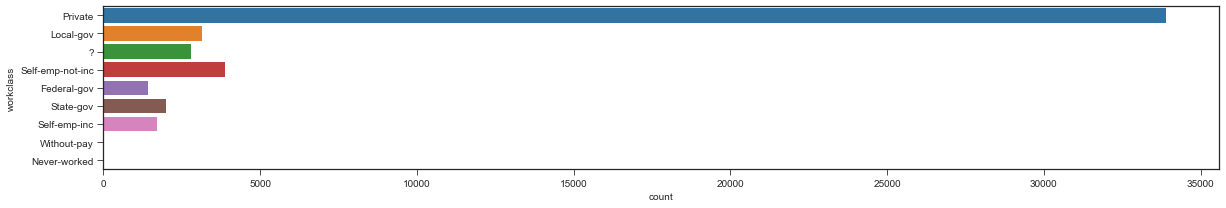

In [19]:
plt.style.use('seaborn-ticks')
plt.figure(figsize=(20,3)) 
sns.countplot(y="workclass", data=my_df)

### age

In [20]:
# make the age variable discretized 
my_df['age_bin'] = pd.cut(my_df['age'], 20)

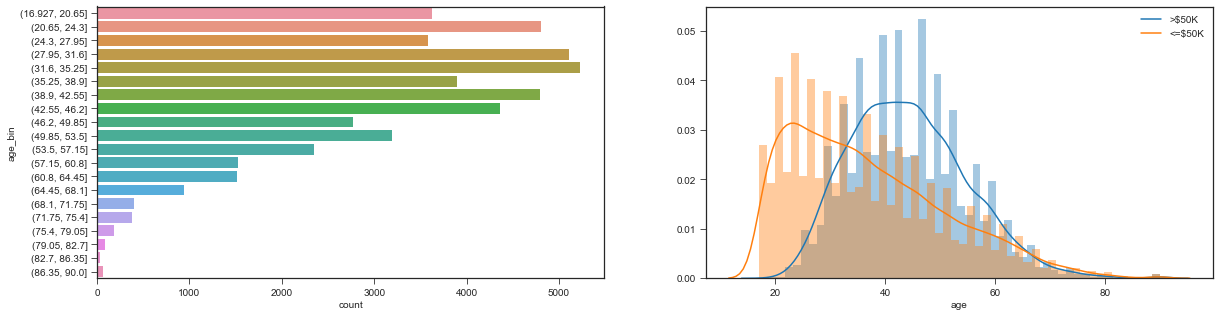

In [21]:
plt.style.use('seaborn-ticks')
fig = plt.figure(figsize=(20,5)) 
plt.subplot(1, 2, 1)
sns.countplot(y="age_bin", data=my_df)
plt.subplot(1, 2, 2)
sns.distplot(my_df[my_df['predclass'] == '>50K']['age'], kde_kws={"label": ">$50K"})
sns.distplot(my_df[my_df['predclass'] == '<=50K']['age'], kde_kws={"label": "<=$50K"})

In [22]:
my_df[['predclass', 'age']].groupby(['predclass'], as_index=False).mean().sort_values(by='age', ascending=False)

,predclass,age
1,>50K,44.275178
0,<=50K,36.872184


### Race

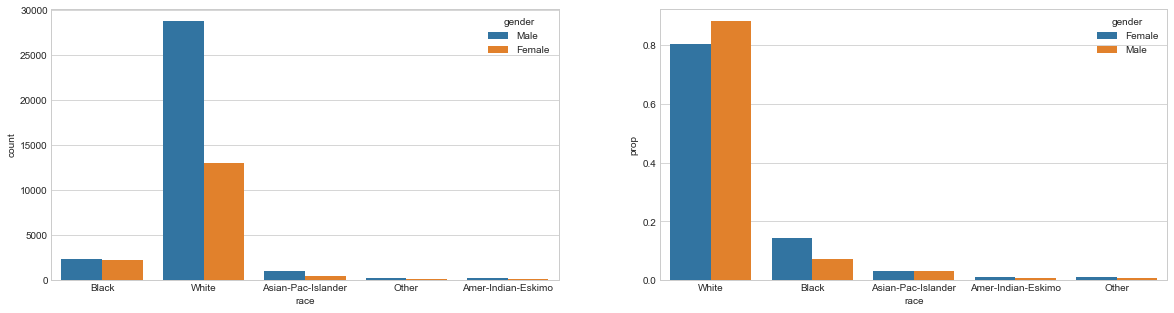

In [23]:
plt.style.use('seaborn-whitegrid')
x, y, hue = "race", "prop", "gender"
#hue_order = ["Male", "Female"]
plt.figure(figsize=(20,5))
plt.subplot(1, 2, 1)

sns.countplot(x=x, hue=hue, data=my_df)
plt.subplot(1, 2, 2)
prop_df = (my_df[x]
           .groupby(my_df[hue])
           .value_counts(normalize=True)
           .rename(y)
           .reset_index())

sns.barplot(x=x, y=y, hue=hue, data=prop_df)

### Hours of Work 

In [24]:
# Let's use the Pandas Cut function to bin the data in equally sized buckets
my_df['hours-per-week_bin'] = pd.cut(my_df['hours-per-week'], 10)
my_df['hours-per-week'] = my_df['hours-per-week']

(20, 60)

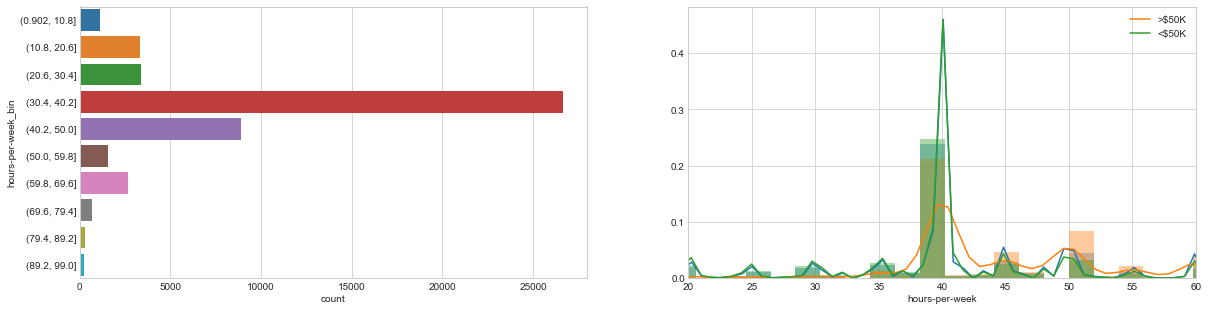

In [25]:
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(20,5)) 
plt.subplot(1, 2, 1)
sns.countplot(y="hours-per-week_bin", data=my_df);
plt.subplot(1, 2, 2)
sns.distplot(my_df['hours-per-week']);
sns.distplot(my_df[my_df['predclass'] == '>50K']['hours-per-week'], kde_kws={"label": ">$50K"})
sns.distplot(my_df[my_df['predclass'] == '<=50K']['hours-per-week'], kde_kws={"label": "<$50K"})
plt.ylim(0, None)
plt.xlim(20, 60)


In [26]:
my_df.head()

,age,workclass,education,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,predclass,age_bin,hours-per-week_bin
0,25.0,Private,dropout,NotMarried,Machine-op-inspct,Own-child,Black,Male,0.0,0,40.0,United-States,<=50K,"(24.3, 27.95]","(30.4, 40.2]"
1,38.0,Private,HighGrad,Married,Farming-fishing,Husband,White,Male,0.0,0,50.0,United-States,<=50K,"(35.25, 38.9]","(40.2, 50.0]"
2,28.0,Local-gov,CommunityCollege,Married,Protective-serv,Husband,White,Male,0.0,0,40.0,United-States,>50K,"(27.95, 31.6]","(30.4, 40.2]"
3,44.0,Private,CommunityCollege,Married,Machine-op-inspct,Husband,Black,Male,7688.0,0,40.0,United-States,>50K,"(42.55, 46.2]","(30.4, 40.2]"
4,18.0,?,CommunityCollege,NotMarried,?,Own-child,White,Female,0.0,0,30.0,United-States,<=50K,"(16.927, 20.65]","(20.6, 30.4]"


In [27]:
# Crossing Numerical Features
my_df['age-hours'] = my_df['age']*my_df['hours-per-week']
my_df['age-hours_bin'] = pd.cut(my_df['age-hours'], 10)

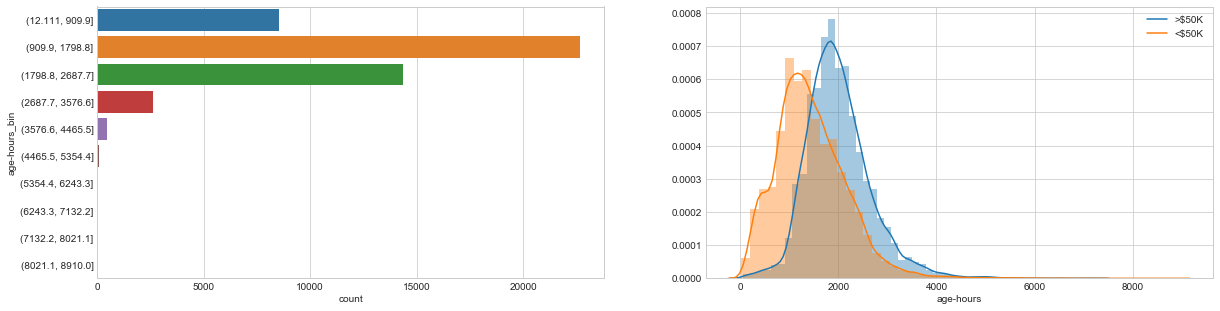

In [28]:
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(20,5)) 
plt.subplot(1, 2, 1)
sns.countplot(y="age-hours_bin", data=my_df);
plt.subplot(1, 2, 2)
sns.distplot(my_df[my_df['predclass'] == '>50K']['age-hours'], kde_kws={"label": ">$50K"})
sns.distplot(my_df[my_df['predclass'] == '<=50K']['age-hours'], kde_kws={"label": "<$50K"})

### Pair Plot

### Correlation Heatmap

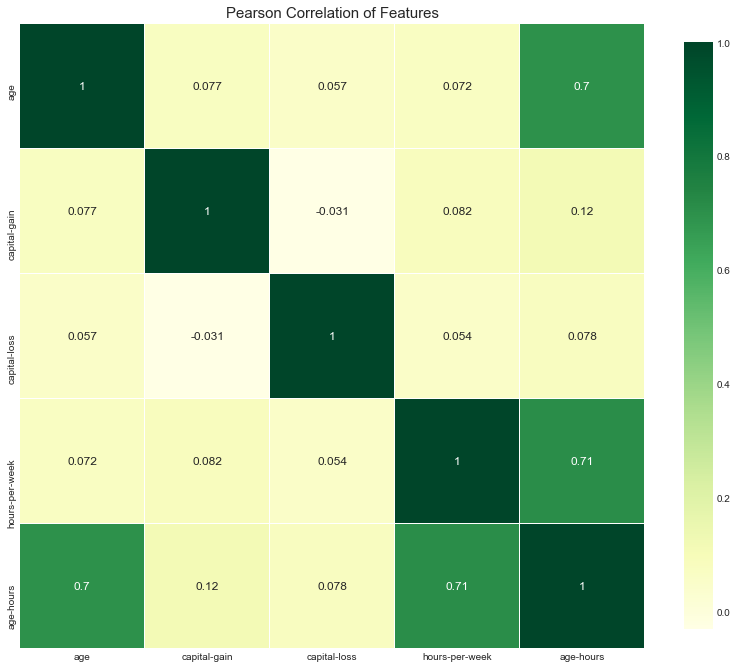

In [29]:
#correlation heatmap of dataset
def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(14, 12))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        df.corr(), 
        cmap = "YlGn",
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 }
    )
    
    plt.title('Pearson Correlation of Features', y=1.05, size=15)
    plt.savefig('correlation_heatmap.png')

correlation_heatmap(my_df)

### Bivariate Analysis

In [30]:
my_df.tail()

,age,workclass,education,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,predclass,age_bin,hours-per-week_bin,age-hours,age-hours_bin
48850,27.0,Private,CommunityCollege,Married,Tech-support,Wife,White,Female,0.0,0,38.0,United-States,<=50K,"(24.3, 27.95]","(30.4, 40.2]",1026.0,"(909.9, 1798.8]"
48851,40.0,Private,HighGrad,Married,Machine-op-inspct,Husband,White,Male,0.0,0,40.0,United-States,>50K,"(38.9, 42.55]","(30.4, 40.2]",1600.0,"(909.9, 1798.8]"
48852,58.0,Private,HighGrad,Widowed,Adm-clerical,Unmarried,White,Female,0.0,0,40.0,United-States,<=50K,"(57.15, 60.8]","(30.4, 40.2]",2320.0,"(1798.8, 2687.7]"
48853,22.0,Private,HighGrad,NotMarried,Adm-clerical,Own-child,White,Male,0.0,0,20.0,United-States,<=50K,"(20.65, 24.3]","(10.8, 20.6]",440.0,"(12.111, 909.9]"
48854,52.0,Self-emp-inc,HighGrad,Married,Exec-managerial,Wife,White,Female,15024.0,0,40.0,United-States,>50K,"(49.85, 53.5]","(30.4, 40.2]",2080.0,"(1798.8, 2687.7]"


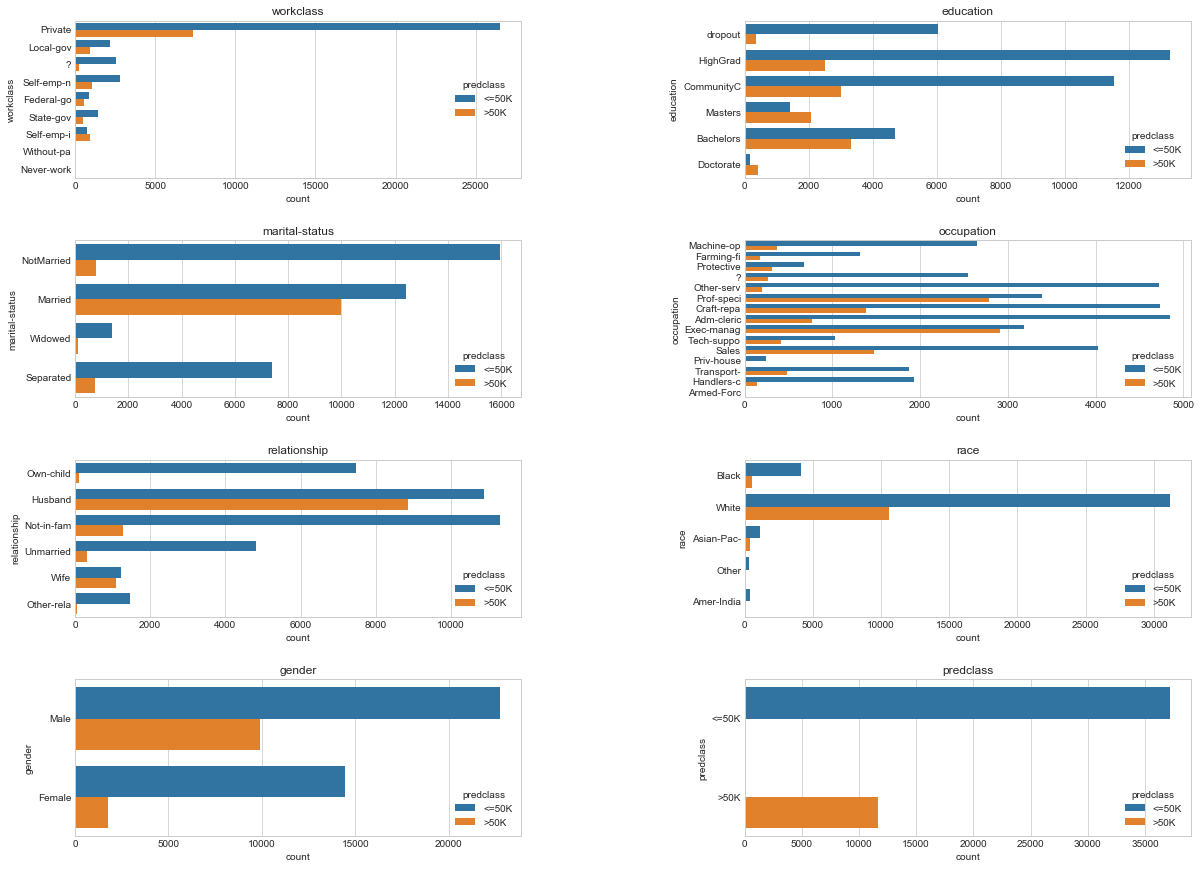

In [31]:
import math

def plot_bivariate_bar(dataset, hue, cols=5, width=20, height=15, hspace=0.2, wspace=0.5):
    dataset = dataset.select_dtypes(include=[np.object])
    plt.style.use('seaborn-whitegrid')
    fig = plt.figure(figsize=(width,height))
    fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=wspace, hspace=hspace)
    rows = math.ceil(float(dataset.shape[1]) / cols)
    for i, column in enumerate(dataset.columns):
        ax = fig.add_subplot(rows, cols, i + 1)
        ax.set_title(column)
        if dataset.dtypes[column] == np.object:
            g = sns.countplot(y=column, hue=hue, data=dataset)
            substrings = [s.get_text()[:10] for s in g.get_yticklabels()]
            g.set(yticklabels=substrings)
            
bivariate_df = my_df.loc[:, ['workclass', 'education', 
           'marital-status', 'occupation', 
           'relationship', 'race', 'gender','predclass']]  

plot_bivariate_bar(bivariate_df, hue='predclass', cols=2, width=20, height=15, hspace=0.4, wspace=0.5)


### Occupation vs. Income Level

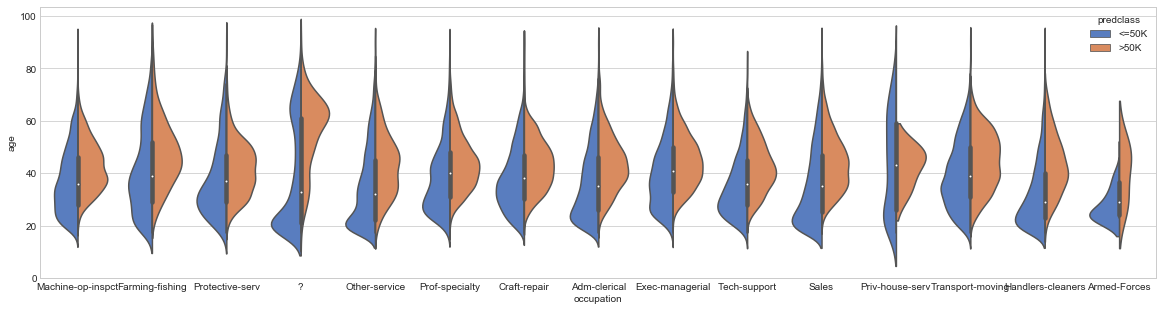

In [32]:
from matplotlib import pyplot
a4_dims = (20, 5)
fig, ax = pyplot.subplots(figsize=a4_dims)
ax = sns.violinplot(x="occupation", y="age", hue="predclass",
                    data=my_df, gridsize=100, palette="muted", split=True, saturation=0.75)
ax

### Race vs. Income Level

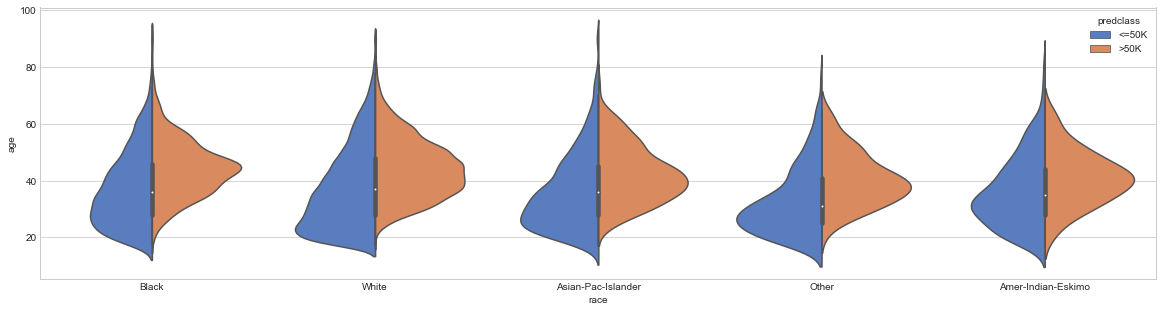

In [33]:
from matplotlib import pyplot
a4_dims = (20, 5)
fig, ax = pyplot.subplots(figsize=a4_dims)
ax = sns.violinplot(x="race", y="age", hue="predclass",
                    data=my_df, gridsize=100, palette="muted", split=True, saturation=0.75)
ax

## Building Machine Learning Models

In [34]:
from sklearn.cluster import KMeans
from matplotlib import cm
from sklearn.metrics import silhouette_samples
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score

from sklearn.decomposition import PCA
from pandas.plotting import scatter_matrix
from mpl_toolkits.mplot3d import Axes3D

from sklearn.model_selection import GridSearchCV


#importing all the required ML packages
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn import svm #support vector Machine
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix
#train,test=train_test_split(train_df,test_size=0.2,random_state=0,stratify=abalone_data['Sex'])

### Feature Encoding 

In [35]:
# Feature Selection and Encoding
from sklearn.svm import SVR
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split #training and testing data split


In [131]:
workclass_map = {'Private':0,'Local-gov':1, '?':2,'Self-emp-not-inc':3,'Federal-gov':4,'State-gov':5,'Self-emp-inc':6,'Without-pay':7,'Never-worked':8}
marital-status_map = ['Never-married':0,'Married-civ-spouse':1,'Widowed':2,'Divorced':3,'Separated':4,'Married-spouse-absent':5,'Married-AF-spouse':6]

# encode and decode it all completed....

occupation ['Machine-op-inspct' 'Farming-fishing' 'Protective-serv' '?'
 'Other-service' 'Prof-specialty' 'Craft-repair' 'Adm-clerical'
 'Exec-managerial' 'Tech-support' 'Sales' 'Priv-house-serv'
 'Transport-moving' 'Handlers-cleaners' 'Armed-Forces']
relationship ['Own-child' 'Husband' 'Not-in-family' 'Unmarried' 'Wife' 'Other-relative']
race ['Black' 'White' 'Asian-Pac-Islander' 'Other' 'Amer-Indian-Eskimo']
gender ['Male' 'Female']
native-country ['United-States' '?' 'Peru' 'Guatemala' 'Mexico' 'Dominican-Republic'
 'Ireland' 'Germany' 'Philippines' 'Thailand' 'Haiti' 'El-Salvador'
 'Puerto-Rico' 'Vietnam' 'South' 'Columbia' 'Japan' 'India' 'Cambodia'
 'Poland' 'Laos' 'England' 'Cuba' 'Taiwan' 'Italy' 'Canada' 'Portugal'
 'China' 'Nicaragua' 'Honduras' 'Iran' 'Scotland' 'Jamaica' 'Ecuador'
 'Yugoslavia' 'Hungary' 'Hong' 'Greece' 'Trinadad&Tobago'
 'Outlying-US(Guam-USVI-etc)' 'France' 'Holand-Netherlands']
predclass ['<=50K' '>50K']

<bound method LabelEncoder.fit_transform of LabelEncoder()> <bound method LabelEncoder.inverse_transform of LabelEncoder()>


ValueError: y contains previously unseen labels: [ 23  34 123]

### Feature Encoding and Train-test split

In [37]:
# Feature Selection and Encoding
from sklearn.svm import SVR
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split #training and testing data split
my_df = my_df.apply(LabelEncoder().fit_transform)
my_df.head()
drop_elements = ['education', 'native-country', 'predclass', 'age_bin', 'age-hours_bin','hours-per-week_bin']
y = my_df["predclass"]
X = my_df.drop(drop_elements, axis=1)
X.head()
print(X.columns)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

Index(['age', 'workclass', 'marital-status', 'occupation', 'relationship',
       'race', 'gender', 'capital-gain', 'capital-loss', 'hours-per-week',
       'age-hours'],
      dtype='object')


In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [39]:
X_train

,age,workclass,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,age-hours
2410,37,4,0,3,0,4,1,0,30,39,902
19964,14,0,2,0,3,4,1,0,0,73,956
3676,29,2,0,10,5,4,0,0,0,39,796
39462,5,4,1,12,1,4,1,0,0,39,430
30668,17,4,1,7,3,1,1,0,0,39,623
...,...,...,...,...,...,...,...,...,...,...,...
44579,10,6,0,8,0,4,1,0,0,39,513
30293,20,4,0,14,0,4,1,0,0,39,669
6650,15,4,1,3,1,4,1,0,0,35,542
35356,20,4,0,4,0,4,1,0,0,45,747


In [40]:
X_train.describe()

,age,workclass,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,age-hours
count,39073.000000,39073.000000,39073.000000,39073.000000,39073.000000,39073.000000,39073.000000,39073.000000,39073.000000,39073.000000,39073.000000
mean,21.611957,3.876820,0.769867,6.575077,1.442812,3.668927,0.669055,6.751900,2.215699,39.385253,678.577893
std,13.694268,1.458283,0.836235,4.219503,1.602367,0.845467,0.470559,24.189974,10.862990,12.274134,256.508683
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,11.000000,4.000000,0.000000,3.000000,0.000000,4.000000,0.000000,0.000000,0.000000,39.000000,498.000000
50%,20.000000,4.000000,1.000000,7.000000,1.000000,4.000000,1.000000,0.000000,0.000000,39.000000,683.000000
75%,31.000000,4.000000,1.000000,10.000000,3.000000,4.000000,1.000000,0.000000,0.000000,44.000000,859.000000
max,73.000000,8.000000,3.000000,14.000000,5.000000,4.000000,1.000000,122.000000,98.000000,95.000000,1438.000000


### Classification Models

#### Perceptron Method

In [41]:
## Perceptron Method
from sklearn.linear_model import Perceptron
ppn = Perceptron(eta0=1, random_state=1)
ppn.fit(X_train, y_train)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=1, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [42]:
y_pred = ppn.predict(X_test)
accuracy_score(y_pred,y_test)

0.7992629747159382

In [43]:
## cross_val_score for ppn method
from sklearn.model_selection import cross_val_score
score_ppn=cross_val_score(ppn, X,y, cv=5)
score_ppn.mean()

0.7321365433403513

#### Gaussian Naive Bayes

In [44]:
# Gaussian Naive Bayes
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
# y_pred = gaussian.predict(X_test)
score_gaussian = gaussian.score(X_test,y_test)
print('The accuracy of Gaussian Naive Bayes is', score_gaussian)

The accuracy of Gaussian Naive Bayes is 0.7925069096120381


#### Logistic Regression

In [45]:
# Logistic Regression
logreg = LogisticRegression(max_iter=5000)
logreg.fit(X_train, y_train)
#y_pred = logreg.predict(X_test)
score_logreg = logreg.score(X_test,y_test)
print('The accuracy of the Logistic Regression is', score_logreg)

The accuracy of the Logistic Regression is 0.80202681953117


#### Random Forest

In [46]:
# Random Forest Classifier
randomforest = RandomForestClassifier()
randomforest.fit(X_train, y_train)
#y_pred = randomforest.predict(X_test)
score_randomforest = randomforest.score(X_test,y_test)
print('The accuracy of the Random Forest Model is', score_randomforest)

The accuracy of the Random Forest Model is 0.8418466577950661


#### K-Nearest Neighbors

In [47]:
# K-Nearest Neighbors
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
#y_pred = knn.predict(X_test)
score_knn = knn.score(X_test,y_test)
print('The accuracy of the KNN Model is',score_knn)

The accuracy of the KNN Model is 0.8082710615211383


In [55]:
algorithems=['Perceptron Method','Gaussian Naive Bayes','Logistic Regression','Random Forest','K-Nearest Neighbors']

# Predict Using New Data

In [49]:
age = 20  # continuous
workclass= 4  # 0 - 8
marital_status=2 # 0 - 3
occupation=1 # 0 - 14
relationship=0 # 0 - 5
race=1 # 0 - 5
gender=1 # 0 - 1
capital_gain=3 # continuous
capital_loss=3 # continuous
hours_per_week=2 # continuous
age_hours=12 # continuous

predict = randomforest.predict([[age,workclass,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,age_hours]])

predict_prob = randomforest.predict_proba([[age,workclass,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,age_hours]])

output_map = {0:"less than fifty thousand",1:"greater than fifty thousand"}

print(predict)

print(output_map[predict[0]])

print(predict_prob)

[0]
less than fifty thousand
[[0.95 0.05]]


In [51]:
age = 41  # continuous
workclass= 5  # 0 - 8
marital_status=2 # 0 - 3
occupation=12 # 0 - 14
relationship= 3 # 0 - 5
race=2 # 0 - 5
gender=0 # 0 - 1
capital_gain=122 # continuous
capital_loss=0 # continuous
hours_per_week=95 # continuous
# education_num=8 # 0 - 15 
age_hours=1223 # continuous

predict = randomforest.predict([[age,workclass,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,age_hours]])

predict_prob = randomforest.predict_proba([[age,workclass,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,age_hours]])

print(predict)

print(output_map[predict[0]])

print(predict_prob)

[1]
greater than fifty thousand
[[0.09 0.91]]


In [52]:
age = 34  # continuous
workclass= 3  # 0 - 8
marital_status= 2 # 0 - 3
occupation = 0  # 0 - 14
relationship = 1 # 0 - 5
race = 2 # 0 - 5
gender = 0 # 0 - 1
capital_gain = 0  # continuous
capital_loss = 0 # continuous
hours_per_week = 23 # continuous
age_hours = 123 # continuous

predict = randomforest.predict([[age,workclass,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,age_hours]])

predict_prob = randomforest.predict_proba([[age,workclass,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,age_hours]])

output_map = {0:"less than fifty thousand",1:"greater than fifty thousand"}

print(predict)

print(output_map[predict[0]])

print(predict_prob)

[0]
less than fifty thousand
[[0.98 0.02]]


In [118]:
def validate():
    age = Entry_1.get().strip()
    workclass= Entry_2.get().strip()
    marital_status= Entry_3.get().strip()
    occupation = Entry_4.get().strip()
    relationship = Entry_5.get().strip()
    race = Entry_6.get().strip()
    gender = Entry_7.get().strip()
    capital_gain = Entry_8.get().strip()
    capital_loss = Entry_9.get().strip()
    hours_per_week = Entry_10.get().strip()
    
    # age 
    if not age.isnumeric() or float(age) >= 100 or float(age) <= 0:
        messagebox.showerror(title="Invalid Age", message="You entered Invalid input.\nplease enter a value which is greater then 0 and less then 100")
        return False
    
    # work class
    for workclass_type in ['Private','Local-gov','?','Self-emp-not-inc','Federal-gov','State-gov','Self-emp-inc','Without-pay','Never-worked']:
        if workclass.lower() == workclass_type.lower():
            break
    else:
        messagebox.showerror(title="Invalid work class",
                                 message="You entered Invalid input.\nplease enter a value from {'Private','Local-gov','?','Self-emp-not-inc','Federal-gov','State-gov','Self-emp-inc','Without-pay','Never-worked'}")
        return False
    

    # marital status
    for marital_status_type in ['Never-married','Married-civ-spouse','Widowed','Divorced','Separated','Married-spouse-absent','Married-AF-spouse']:
        if marital_status.lower() == marital_status_type.lower():
            break
    else:
        messagebox.showerror(title="Invalid marital status",
                                 message="You entered Invalid marital status.\nplease enter a value from {'Never-married','Married-civ-spouse','Widowed','Divorced','Separated','Married-spouse-absent','Married-AF-spouse'}")
        return False

    # occupation
    for occupation_type in ['Machine-op-inspct','Farming-fishing','Protective-serv','?','Other-service','Prof-specialty','Craft-repair','Adm-clerical','Exec-managerial','Tech-support','Sales','Priv-house-serv','Transport-moving','Handlers-cleaners','Armed-Forces']:
        if occupation.lower() == occupation_type.lower():
            break
    else:
        messagebox.showerror(title="Invalid occupation",
                                 message="You entered Invalid occupation.\nplease enter a value from {'Machine-op-inspct','Farming-fishing','Protective-serv','?','Other-service','Prof-specialty','Craft-repair','Adm-clerical','Exec-managerial','Tech-support','Sales','Priv-house-serv','Transport-moving','Handlers-cleaners','Armed-Forces'}")
        return False

    # relationship
    for relationship_type in ['Own-child','Husband','Not-in-family','Unmarried','Wife','Other-relative']:
        if relationship.lower() == relationship_type.lower():
            break

    else:
        messagebox.showerror(title="Invalid relationship",
                                 message="You entered Invalid relationship.\nplease enter a value from {'Own-child','Husband','Not-in-family','Unmarried','Wife','Other-relative'}")
        return False

    # race
    for race_type in ['Black','White','Asian-Pac-Islander','Other','Amer-Indian-Eskimo']:
        if race.lower() == race_type.lower():
            break
    else:
        messagebox.showerror(title="Invalid race",
                                 message="You entered Invalid race.\nplease enter a value from {'Black','White','Asian-Pac-Islander','Other','Amer-Indian-Eskimo'}")
        return False

    # gender
    for gender_type in ['Male','Female']:
        if gender.lower() == gender_type.lower():
            break
    else:
        messagebox.showerror(title="Invalid gender",
                                 message="You entered Invalid gender.\nplease enter a value from {'Male','Female'}")
        return False
    
    # capital gain
    if not capital_gain.isnumeric() or float(capital_gain) >= 100000 or float(capital_gain) <= 0:
        messagebox.showerror(title="Invalid capital gain", message="You entered Invalid input.\nplease enter a value which is greater then 0 and less then 100000")
        return False
    
    # capiral loss
    if not capital_loss.isnumeric() or float(capital_loss) >= 100000 or float(capital_loss) <= 0:
        messagebox.showerror(title="Invalid capital loss", message="You entered Invalid input.\nplease enter a value which is greater then 0 and less then 100000")
        return False
    
    # hours per week
    if not hours_per_week.isnumeric() or float(hours_per_week) >= 168 or float(hours_per_week) <= 0:
        messagebox.showerror(title="Invalid hours per week", message="You entered Invalid input.\nplease enter a value which is greater then 0 and less then 168")
        return False
    
    return True



In [119]:
def predict():
    
    age = Entry_1.get().strip()
    workclass= Entry_2.get().strip()
    marital_status= Entry_3.get().strip()
    occupation = Entry_4.get().strip()
    relationship = Entry_5.get().strip()
    race = Entry_6.get().strip()
    gender = Entry_7.get().strip()
    capital_gain = Entry_8.get().strip()
    capital_loss = Entry_9.get().strip()
    hours_per_week = Entry_10.get().strip()
#     age_hours = float(age)*float(hours_per_week)
    
    print(age,workclass,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,age_hours)
    
    algo_models = [ppn,gaussian,logreg,randomforest,knn]
    
    isValid = validate()
            
    # random forest
    selected_algorithm = algorithems.index(clicked.get())
    
    if isValid:
        gender_map = {'male':1,'female':0}
        
        
        output_map = {0:"less than or equals to fifty thousand",1:"greater than fifty thousand"}
        
        
        age = float(age)
        workclass = 
        
        prediction_input = [[age,workclass,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,age_hours]]
        out = algo_models[selected_algorithm].predict(prediction_input)
        out_prob = loaded_model.predict_proba(prediction_input)

        
        print(output_map[out])
        output.delete(0,END)
        output.insert(0,output_map[out])

In [120]:
from tkinter import *
from tkinter import ttk
from tkinter import filedialog, messagebox

window = Tk()
window.title("Asthma Prediction")
output_path = ""

# left_color = "#6DECB9"
# right_color = "#EEF5B2"
# text_color = "#334257"

left_color = "#51C4D3"
right_color = "#D8E3E7"
text_color = "#334257"



#getting screen width and height of display
width= window.winfo_screenwidth()
height= window.winfo_screenheight()

#setting tkinter window size
window.geometry("%dx%d" % (width, height))
window.configure(bg=right_color)

canvas = Canvas(window, bg=right_color, height=height, width=(width), bd=0, highlightthickness=0, relief="ridge")
canvas.place(x=0, y=0)
canvas.create_rectangle(431, 0,0, height, fill=left_color, outline="") # left rectangle
canvas.create_rectangle(40, 160, 40 + 60, 160 + 5, fill=right_color, outline="") # underline for title.

Entry_1 = Entry(window)
Entry_1.place(x=470.0, y=110, width=321.0, height=35)
Entry_1.focus()

Entry_2 = Entry(window)
Entry_2.place(x=940.0, y=110, width=321.0, height=35)

Entry_3 = Entry(window)
Entry_3.place(x=470.0, y=180, width=321.0, height=35)

Entry_4 = Entry(window)
Entry_4.place(x=940.0, y=180, width=321.0, height=35)

Entry_5 = Entry(window)
Entry_5.place(x=470.0, y=260, width=321.0, height=35)

Entry_6 = Entry(window)
Entry_6.place(x=940.0, y=260, width=321.0, height=35)

Entry_7 = Entry(window)
Entry_7.place(x=470.0, y=340, width=321.0, height=35)

Entry_8 = Entry(window)
Entry_8.place(x=940.0, y=340, width=321.0, height=35)

Entry_9 = Entry(window)
Entry_9.place(x=470.0, y=420, width=321.0, height=35)

Entry_10 = Entry(window)
Entry_10.place(x=940.0, y=420, width=321.0, height=35)

output = Entry(window)
output.place(x=600.0, y=670, width=190.0, height=35)

# age,workclass,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,age_hours

canvas.create_text(487.0, 100.0, text="age ", fill="#515486", font=("Arial-BoldMT", int(13.0)))
canvas.create_text(978.0, 100.0, text="workclass ", fill="#515486", font=("Arial-BoldMT", int(13.0)))
canvas.create_text(520.0, 170.0, text="marital status ", fill="#515486", font=("Arial-BoldMT", int(13.0)))
canvas.create_text(983.0, 170.0, text="occupation ", fill="#515486", font=("Arial-BoldMT", int(13.0)))
canvas.create_text(513.0, 250.0, text="relationship ", fill="#515486", font=("Arial-BoldMT", int(13.0)))
canvas.create_text(960.0, 250.0, text="race ", fill="#515486", font=("Arial-BoldMT", int(13.0)))
canvas.create_text(500.0, 330.0, text="gender ", fill="#515486", font=("Arial-BoldMT", int(13.0)))
canvas.create_text(983.0, 330.0, text="capital gain ", fill="#515486", font=("Arial-BoldMT", int(13.0)))
canvas.create_text(512.0, 410.0, text="capital loss ", fill="#515486", font=("Arial-BoldMT", int(13.0)))
canvas.create_text(1028.0, 410.0, text="working hours per week ", fill="#515486", font=("Arial-BoldMT", int(13.0)))

canvas.create_text(573.5, 50.0, text="Enter the details.", fill="#515486", font=("Arial-BoldMT", int(22.0)))
 
title = Label(text="Asthma Prediction", bg=left_color, fg="#0A1931", font=("Arial-BoldMT", int(20.0)))
title.place(x=27.0, y=120.0)

info_text = Label(text="Please enter all the values carefully\n"
                  "and follow instruction..\n"
                  "* The value of age should be greater than \n   0 and less than 100\n"
                  "* The gender field should be any one of \n   the following {'male','female','others'}\n"
                  "* All other fields except age and gender,\n   value should be either 'Yes' or 'No'\n",
                  bg=left_color, fg=text_color, justify="left", font=("Georgia", int(16.0)))

info_text.place(x=27.0, y=200.0)

select_algo = Label(text="select the algorithm", bg=left_color, fg=text_color, justify="left", font=("Georgia", int(16.0)))
select_algo.place(x=27.0, y=550.0)

clicked = StringVar()

# initial menu text
clicked.set( "random forest" )

algorithmchoosen = OptionMenu( window , clicked , *algorithems)
algorithmchoosen.config(bg=right_color, fg=text_color)
algorithmchoosen.place(x=220.0,y=550.0)

generate_btn = Button(window, text = 'Asthma_result',font=("Helvetica", 16),background=left_color,command = predict)
generate_btn.place(x=460, y=670, width=140, height=35)

window.mainloop()

          123


Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\yogesh\anaconda3\lib\tkinter\__init__.py", line 1705, in __call__
    return self.func(*args)
  File "<ipython-input-119-e3b116f32540>", line 22, in predict
    selected_algorithm = algorithems.index(clicked.get())
ValueError: 'random forest' is not in list


23          123


Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\yogesh\anaconda3\lib\tkinter\__init__.py", line 1705, in __call__
    return self.func(*args)
  File "<ipython-input-119-e3b116f32540>", line 22, in predict
    selected_algorithm = algorithems.index(clicked.get())
ValueError: 'random forest' is not in list


23 ?         123


Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\yogesh\anaconda3\lib\tkinter\__init__.py", line 1705, in __call__
    return self.func(*args)
  File "<ipython-input-119-e3b116f32540>", line 22, in predict
    selected_algorithm = algorithems.index(clicked.get())
ValueError: 'random forest' is not in list


23 ?         123


Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\yogesh\anaconda3\lib\tkinter\__init__.py", line 1705, in __call__
    return self.func(*args)
  File "<ipython-input-119-e3b116f32540>", line 22, in predict
    selected_algorithm = algorithems.index(clicked.get())
ValueError: 'random forest' is not in list


23 ? Widowed        123


Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\yogesh\anaconda3\lib\tkinter\__init__.py", line 1705, in __call__
    return self.func(*args)
  File "<ipython-input-119-e3b116f32540>", line 22, in predict
    selected_algorithm = algorithems.index(clicked.get())
ValueError: 'random forest' is not in list


23 ? Widowed ?       123


Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\yogesh\anaconda3\lib\tkinter\__init__.py", line 1705, in __call__
    return self.func(*args)
  File "<ipython-input-119-e3b116f32540>", line 22, in predict
    selected_algorithm = algorithems.index(clicked.get())
ValueError: 'random forest' is not in list


23 ? Widowed ? not-in-family      123


Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\yogesh\anaconda3\lib\tkinter\__init__.py", line 1705, in __call__
    return self.func(*args)
  File "<ipython-input-119-e3b116f32540>", line 22, in predict
    selected_algorithm = algorithems.index(clicked.get())
ValueError: 'random forest' is not in list


23 ? Widowed ? not-in-family black     123


Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\yogesh\anaconda3\lib\tkinter\__init__.py", line 1705, in __call__
    return self.func(*args)
  File "<ipython-input-119-e3b116f32540>", line 22, in predict
    selected_algorithm = algorithems.index(clicked.get())
ValueError: 'random forest' is not in list


23 ? Widowed ? not-in-family black male    123


Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\yogesh\anaconda3\lib\tkinter\__init__.py", line 1705, in __call__
    return self.func(*args)
  File "<ipython-input-119-e3b116f32540>", line 22, in predict
    selected_algorithm = algorithems.index(clicked.get())
ValueError: 'random forest' is not in list


23 ? Widowed ? not-in-family black male 342   123


Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\yogesh\anaconda3\lib\tkinter\__init__.py", line 1705, in __call__
    return self.func(*args)
  File "<ipython-input-119-e3b116f32540>", line 22, in predict
    selected_algorithm = algorithems.index(clicked.get())
ValueError: 'random forest' is not in list


23 ? Widowed ? not-in-family black male 342 123  123


Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\yogesh\anaconda3\lib\tkinter\__init__.py", line 1705, in __call__
    return self.func(*args)
  File "<ipython-input-119-e3b116f32540>", line 22, in predict
    selected_algorithm = algorithems.index(clicked.get())
ValueError: 'random forest' is not in list


23 ? Widowed ? not-in-family black male 342 123 23 123


Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\yogesh\anaconda3\lib\tkinter\__init__.py", line 1705, in __call__
    return self.func(*args)
  File "<ipython-input-119-e3b116f32540>", line 22, in predict
    selected_algorithm = algorithems.index(clicked.get())
ValueError: 'random forest' is not in list
